In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import os
%matplotlib inline
import numpy as np

In [299]:
os.getcwd()
path = "C:/Users/okori/Desktop/GlobalAcademy.onecampus/datasets"
os.chdir(path)
os.getcwd()

'C:\\Users\\okori\\Desktop\\GlobalAcademy.onecampus\\datasets'

In [300]:
# Setting display parameters to avoid truncating of information
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.width', None)


<ipython-input-300-770638904c71>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [397]:
# Reading in the xlsx file containing the data
df = pd.read_excel("Clinical_features_data.xlsx") # sep='\t', error_bad_lines=False, header=0, encoding='utf-16'
df.sample(5)

,ER,PR,HER2,Mol Subtype,Oncotype score,Staging(Tumor Size)# [T],Staging(Nodes)#(Nx replaced by -1)[N],Staging(Metastasis)#(Mx -replaced by -1)[M],Tumor Grade(T)\n(Tubule),Tumor Grade(N)\n(Nuclear),Tumor Grade(M)\n(Mitotic),1=low 2=intermediate 3=high\n,Histologic type,Tumor Location,Tumor Position,Bilateral breast cancer?\n{ 0=no 1=yes},If Bilateral Different Rec Status\n{0=no 1=yes},Side Annotated\n{L=left R=right},For Other Side If BilateralSide of cancer (for the other side)\n{L=left R=right},Oncotype score (for the other side){##},Nottingham grade (for the other side){#},ER (for the other side)\n{0 = neg 1 = pos},PR (for the other side)\n{0 = neg 1 = pos},HER2 (for the other side)\n{0 = neg 1 = pos 2=borderline},Mol Subtype (for the other side)\n{0 = luminal-like 1 = ER/PR pos HER2 pos 2 = her2\n3 = trip neg},Pathologic Response to Neoadjuvant Therapy
339,1,1,0,0,17.0,2.0,0.0,-1,2.0,3.0,1.0,2.0,1.0,L,L 930 L 11 L 12,0,NP,NP,NP,NP,NP,NP,NP,NP,NP,NaN
863,1,1,0,0,15.0,2.0,0.0,0,3.0,3.0,1.0,2.0,1.0,R,R subareolar,0,NP,NP,NP,NP,NP,NP,NP,NP,NP,NaN
386,1,1,0,0,NaN,1.0,1.0,0,3.0,3.0,1.0,2.0,1.0,R,R 12-6,0,NP,NP,NP,NP,NP,NP,NP,NP,NP,2.0
689,1,1,0,0,NaN,1.0,0.0,0,NaN,3.0,NaN,NaN,1.0,R,R,0,NP,NP,NP,NP,NP,NP,NP,NP,NP,NaN
186,0,0,0,3,NaN,1.0,1.0,-1,3.0,3.0,3.0,3.0,1.0,R,R upper outer quadrant,0,NP,NP,NP,NP,NP,NP,NP,NP,NP,NaN


- Data Assessement & Inspection

In [180]:
# Inspecting the fields in the dataset
df.info(max_cols=None, memory_usage=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 26 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   ER                                                                                                922 non-null    int64  
 1   PR                                                                                                922 non-null    int64  
 2   HER2                                                                                              922 non-null    int64  
 3   Mol Subtype                                                                                       922 non-null    int64  
 4   Oncotype score                                                                                    261 non-null    float64
 5   S

In [66]:
# Inspecting the shape of the dataset
df.shape

(922, 26)

In [68]:
# Assessing the datatypes of variables in the dataset
df.dtypes

ER                                                                                                    int64  
PR                                                                                                    int64  
HER2                                                                                                  int64  
Mol Subtype                                                                                           int64  
Oncotype score                                                                                        float64
Staging(Tumor Size)# [T]                                                                              float64
Staging(Nodes)#(Nx replaced by -1)[N]                                                                 float64
Staging(Metastasis)#(Mx -replaced by -1)[M]                                                           int64  
Tumor Grade(T)\n(Tubule)                                                                              float64
Tumor Grad

In [398]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ER,922.0,0.744035,0.436639,0.0,0.0,1.0,1.0,1.0
PR,922.0,0.648590,0.477670,0.0,0.0,1.0,1.0,1.0
HER2,922.0,0.176790,0.381698,0.0,0.0,0.0,0.0,1.0
Mol Subtype,922.0,0.774403,1.171076,0.0,0.0,0.0,1.0,3.0
Oncotype score,261.0,18.360153,10.229698,0.0,12.0,16.0,22.0,76.0
Staging(Tumor Size)# [T],916.0,1.699782,0.742496,1.0,1.0,2.0,2.0,4.0
Staging(Nodes)#(Nx replaced by -1)[N],898.0,0.574610,0.817521,0.0,0.0,0.0,1.0,3.0
Staging(Metastasis)#(Mx -replaced by -1)[M],922.0,-0.187636,0.466627,-1.0,0.0,0.0,0.0,1.0
Tumor Grade(T)\n(Tubule),907.0,2.691290,0.603120,1.0,3.0,3.0,3.0,3.0
Tumor Grade(N)\n(Nuclear),915.0,2.443716,0.604371,1.0,2.0,3.0,3.0,3.0


In [108]:
df.sample(10)

,ER,PR,HER2,Mol Subtype,Oncotype score,Staging(Tumor Size)# [T],Staging(Nodes)#(Nx replaced by -1)[N],Staging(Metastasis)#(Mx -replaced by -1)[M],Tumor Grade(T)\n(Tubule),Tumor Grade(N)\n(Nuclear),Tumor Grade(M)\n(Mitotic),1=low 2=intermediate 3=high\n,Histologic type,Tumor Location,Tumor Position,Bilateral breast cancer?\n{ 0=no 1=yes},If Bilateral Different Rec Status\n{0=no 1=yes},Side Annotated\n{L=left R=right},For Other Side If BilateralSide of cancer (for the other side)\n{L=left R=right},Oncotype score (for the other side){##},Nottingham grade (for the other side){#},ER (for the other side)\n{0 = neg 1 = pos},PR (for the other side)\n{0 = neg 1 = pos},HER2 (for the other side)\n{0 = neg 1 = pos 2=borderline},Mol Subtype (for the other side)\n{0 = luminal-like 1 = ER/PR pos HER2 pos 2 = her2\n3 = trip neg},Pathologic Response to Neoadjuvant Therapy
246,1,1,0,0,22.0,1.0,1.0,-1,3.0,2.0,1.0,2.0,1.0,L,L 12,0,NP,NP,NP,NP,NP,NP,NP,NP,NP,NaN
603,0,0,1,2,NaN,2.0,1.0,-1,3.0,3.0,1.0,2.0,1.0,L,L 2-3,0,NP,NP,NP,NP,NP,NP,NP,NP,NP,NaN
193,1,1,0,0,15.0,1.0,0.0,0,3.0,2.0,1.0,2.0,1.0,R,R 9,0,NP,NP,NP,NP,NP,NP,NP,NP,NP,NaN
82,1,1,0,0,NaN,1.0,0.0,-1,3.0,2.0,1.0,2.0,1.0,L,L 2 L 3,0,NP,NP,NP,NP,NP,NP,NP,NP,NP,NaN
905,0,0,0,3,NaN,1.0,NaN,-1,3.0,3.0,1.0,2.0,0.0,L,L,0,NP,NP,NP,NP,NP,NP,NP,NP,NP,NaN
104,0,0,1,2,NaN,2.0,2.0,0,3.0,2.0,1.0,NaN,NaN,NaN,L 10,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,1.0
390,1,1,1,1,NaN,2.0,3.0,0,3.0,2.0,1.0,2.0,1.0,R,R 1,0,NP,NP,NP,NP,NP,NP,NP,NP,NP,NaN
145,1,1,1,1,NaN,1.0,0.0,0,2.0,2.0,2.0,NaN,NaN,NaN,L,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NaN
540,1,1,1,1,NaN,1.0,0.0,0,2.0,3.0,1.0,2.0,1.0,L,L 4,0,NP,NP,NP,NP,NP,NP,NP,NP,NP,2.0
426,1,1,0,0,18.0,1.0,0.0,0,3.0,3.0,1.0,2.0,1.0,L,L,0,NP,NP,NP,NP,NP,NP,NP,NP,NP,NaN


In [92]:
df.tail()

,ER,PR,HER2,Mol Subtype,Oncotype score,Staging(Tumor Size)# [T],Staging(Nodes)#(Nx replaced by -1)[N],Staging(Metastasis)#(Mx -replaced by -1)[M],Tumor Grade(T)\n(Tubule),Tumor Grade(N)\n(Nuclear),Tumor Grade(M)\n(Mitotic),1=low 2=intermediate 3=high\n,Histologic type,Tumor Location,Tumor Position,Bilateral breast cancer?\n{ 0=no 1=yes},If Bilateral Different Rec Status\n{0=no 1=yes},Side Annotated\n{L=left R=right},For Other Side If BilateralSide of cancer (for the other side)\n{L=left R=right},Oncotype score (for the other side){##},Nottingham grade (for the other side){#},ER (for the other side)\n{0 = neg 1 = pos},PR (for the other side)\n{0 = neg 1 = pos},HER2 (for the other side)\n{0 = neg 1 = pos 2=borderline},Mol Subtype (for the other side)\n{0 = luminal-like 1 = ER/PR pos HER2 pos 2 = her2\n3 = trip neg},Pathologic Response to Neoadjuvant Therapy
917,1,1,0,0,NaN,2.0,2.0,0,3.0,3.0,1.0,2.0,1.0,R,R,0,NP,NP,NP,NP,NP,NP,NP,NP,NP,NaN
918,1,1,0,0,22.0,1.0,0.0,0,3.0,3.0,1.0,2.0,1.0,R,R with calcs,0,NP,NP,NP,NP,NP,NP,NP,NP,NP,NaN
919,1,1,0,0,9.0,1.0,0.0,0,3.0,2.0,1.0,2.0,2.0,R,R 9 and L,1,0,L,L,NaN,1,NP,NP,NP,NP,NaN
920,1,1,0,0,NaN,2.0,1.0,-1,3.0,2.0,1.0,2.0,1.0,R,R upper outer quadrant,0,NP,NP,NP,NP,NP,NP,NP,NP,NP,NaN
921,1,1,0,0,6.0,2.0,0.0,0,1.0,1.0,1.0,1.0,1.0,L,L,0,NP,NP,NP,NP,NP,NP,NP,NP,NP,NaN


In [236]:
# Assessing and inspecting the data for missing values (Nan) in each variable
df.isnull().sum()

ER                                                                                                    0  
PR                                                                                                    0  
HER2                                                                                                  0  
Mol Subtype                                                                                           0  
Oncotype score                                                                                        661
Staging(Tumor Size)# [T]                                                                              6  
Staging(Nodes)#(Nx replaced by -1)[N]                                                                 24 
Staging(Metastasis)#(Mx -replaced by -1)[M]                                                           0  
Tumor Grade(T)\n(Tubule)                                                                              15 
Tumor Grade(N)\n(Nuclear)                     

In [182]:
# Inspecting the Oncotype variable for number of null values
df['Oncotype score'].isnull().sum()

661

In [183]:
# Inspecting the data for duplicated observations (samples)
df.duplicated().sum()

21

##### Inspecting each variable for unique values

In [94]:
df.ER.unique()

array([0, 1], dtype=int64)

In [95]:
df.PR.unique()

array([0, 1], dtype=int64)

In [97]:
df.HER2.unique()

array([1, 0], dtype=int64)

In [184]:
df['Tumor Grade(N)\n(Nuclear)'].unique()

array([ 2.,  3.,  1., nan])

In [185]:
df['Bilateral breast cancer?\n{ 0=no 1=yes}'].unique()

array([0, 'NC', nan, 1], dtype=object)

In [186]:
# CHecking the datatype of Bilateral breast cancer field above
df['Bilateral breast cancer?\n{ 0=no 1=yes}'].dtype

dtype('O')

In [187]:
df['Nottingham grade (for the other side){#}'].unique()

array(['NP', 'NC', 3, 2, 1, nan], dtype=object)

##### Data Cleaning and Pre-processing

In [399]:
# Renaming the features in the dataset

df.rename(columns={df.columns[0]: 'ER Receptor',
                   df.columns[1]: 'PR Receptor',
                   df.columns[2]: 'HER Receptor',
                   df.columns[5]: 'Staging(Tumor Size)',
                   df.columns[6]: 'Staging(Nodes)',
                   df.columns[7]: 'Staging(Metastasis)',
                   df.columns[8]: 'Tumor Grade(Tubule)',
                   df.columns[9]: 'Tumor Grade(Nuclear)',
                   df.columns[10]: 'Tumor Grade(Mitotic)',
                   df.columns[11]: 'Nottimgham Grade',
                   df.columns[14]: 'Tumor Position',
                   df.columns[15]: 'Bilateral Breast cancer',
                   df.columns[16]: 'Bilateral Rec Status',
                   df.columns[17]: 'Bilateral Side Annotated',
                   df.columns[18]: 'For Other side of Bilateral, side of cancer',
                   df.columns[19]: 'Oncotype score for the other side', 
                   df.columns[20]: 'Nottimgham Grade for the other side',
                   df.columns[21]: 'ER for the other side',
                   df.columns[22]: 'PR for the other side',
                   df.columns[23]: 'HER2 for the other side',
                   df.columns[24]: 'Mol Type for the other side'},
                   inplace=True)

#### Treating for missing values in the data

The feature 'Oncotype score' contains lots of missing values, but will be not be dropped. A model will be used to predict the missing values as this feature appears to be an import predictor


In [400]:
df2 = df.copy()
df2.sample(5)

,ER Receptor,PR Receptor,HER Receptor,Mol Subtype,Oncotype score,Staging(Tumor Size),Staging(Nodes),Staging(Metastasis),Tumor Grade(Tubule),Tumor Grade(Nuclear),Tumor Grade(Mitotic),Nottimgham Grade,Histologic type,Tumor Location,Tumor Position,Bilateral Breast cancer,Bilateral Rec Status,Bilateral Side Annotated,"For Other side of Bilateral, side of cancer",Oncotype score for the other side,Nottimgham Grade for the other side,ER for the other side,PR for the other side,HER2 for the other side,Mol Type for the other side,Pathologic Response to Neoadjuvant Therapy
878,0,0,0,3,NaN,1.0,2.0,0,2.0,3.0,3.0,NaN,NaN,NaN,L,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,2.0
537,1,1,0,0,NaN,2.0,0.0,0,3.0,2.0,1.0,2.0,1.0,R,R 830,0,NP,NP,NP,NP,NP,NP,NP,NP,NP,NaN
117,1,1,0,0,14.0,2.0,1.0,-1,1.0,1.0,1.0,1.0,1.0,R,R 930,0,NP,NP,NP,NP,NP,NP,NP,NP,NP,NaN
726,1,1,0,0,38.0,2.0,0.0,0,3.0,2.0,2.0,NaN,NaN,NaN,R 3,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NaN
735,1,0,0,0,NaN,1.0,0.0,0,1.0,1.0,1.0,NaN,NaN,NaN,R,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NaN


In [190]:
df2.isnull().sum()

ER Recptor                                     0  
PR Receptor                                    0  
HER Receptor                                   0  
Mol Subtype                                    0  
Staging(Tumor Size)                            6  
Staging(Nodes)                                 24 
Staging(Metastasis)                            0  
Tumor Grade(Tubule)                            15 
Tumor Grade(Nuclear)                           7  
Tumor Grade(Mitotic)                           21 
Nottimgham Grade                               284
Histologic type                                276
Tumor Location                                 271
Tumor Position                                 0  
Bilateral breast cancer?\n{ 0=no 1=yes}        1  
Bilateral Rec Status                           0  
Bilateral Side Annotated                       0  
For Other side of Bilateral, side of cancer    0  
Oncotype score for the other side              26 
Nottimgham Grade for the other 

In [219]:
df2['Nottimgham Grade'].sample(15)

516   NaN 
727    2.0
222    2.0
914    3.0
448    2.0
819    3.0
707    1.0
730    2.0
488    3.0
341    2.0
372   NaN 
579    2.0
666    3.0
656    2.0
613    3.0
Name: Nottimgham Grade, dtype: float64

<AxesSubplot:ylabel='Density'>

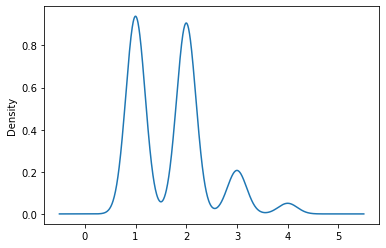

In [305]:
df2['Staging(Tumor Size)'].plot(kind='density') 

# Staging Tumor feature is Tr-modal, to treat missing values so filling with mean of the distribution will not work
# Also forward or backward fill (Linear Interpolation) is not a good idea since the data is not distribution of attributes an individual
# Best approach is using the K-nearest neigbour means for data imputation

In [401]:
from sklearn.impute import KNNImputer

# creating an instance of KNNImputer
imputer = KNNImputer(n_neighbors=4)

# fill missing values in the series
df2['Staging(Tumor Size)'] = imputer.fit_transform(df2['Staging(Tumor Size)'].values.reshape(-1, 1))

# checking to see if nan values have been treated
df2['Staging(Tumor Size)'].isnull().sum()

0

In [402]:
# creating an instance of KNNImputer
imputer = KNNImputer(n_neighbors=4)

# fill missing values in the series
df2['Staging(Nodes)'] = imputer.fit_transform(df2['Staging(Nodes)'].values.reshape(-1, 1))

# checking to see if nan values have been treated
df2['Staging(Nodes)'].isnull().sum()

0

In [403]:
# creating an instance of KNNImputer
imputer = KNNImputer(n_neighbors=4)

# fill missing values in the series
df2['Tumor Grade(Tubule)'] = imputer.fit_transform(df2['Tumor Grade(Tubule)'].values.reshape(-1, 1))

# checking to see if nan values have been treated

df2['Tumor Grade(Tubule)'].isnull().sum()

0

In [404]:
# creating an instance of KNNImputer
imputer = KNNImputer(n_neighbors=4)

# fill missing values in the series
df2['Tumor Grade(Nuclear)'] = imputer.fit_transform(df2['Tumor Grade(Nuclear)'].values.reshape(-1, 1))

# checking to see if nan values have been treated

df2['Tumor Grade(Nuclear)'].isnull().sum()

0

In [405]:
# Filing of missing values for the Tumor Mitotic variable will be done with the mode value of the variable
df2['Tumor Grade(Mitotic)'].fillna(df["Tumor Grade(Mitotic)"].mode()[0], inplace=True)
df2['Tumor Grade(Mitotic)'].isnull().sum()

0

Checking data cleaning so far

In [269]:
df2.isnull().sum()

ER Recptor                                     0  
PR Receptor                                    0  
HER Receptor                                   0  
Mol Subtype                                    0  
Oncotype score                                 661
Staging(Tumor Size)                            0  
Staging(Nodes)                                 0  
Staging(Metastasis)                            0  
Tumor Grade(Tubule)                            0  
Tumor Grade(Nuclear)                           0  
Tumor Grade(Mitotic)                           0  
Nottimgham Grade                               284
Histologic type                                276
Tumor Location                                 271
Tumor Position                                 0  
Bilateral Breast cancer                        0  
Bilateral Rec Status                           0  
Bilateral Side Annotated                       0  
For Other side of Bilateral, side of cancer    0  
Oncotype score for the other si

For data imputation of null values in the variables listed below, classification machine learning models be used:
- Oncotype score
- Nottigham grade
- Histologic type
- Tumor location

In [406]:
df2["Bilateral Breast cancer"].fillna(df2["Bilateral Breast cancer"].mode()[0], inplace=True)
df2["Bilateral Breast cancer"].isnull().sum()

0

In [407]:
df2['Tumor Location'].value_counts()

R    337
L    314
Name: Tumor Location, dtype: int64

In [408]:
df2["Bilateral Breast cancer"].value_counts()

0     623
NC    271
1     28 
Name: Bilateral Breast cancer, dtype: int64

In [409]:
df2['Oncotype score for the other side'].value_counts()

NP    623
NC    271
13    1  
21    1  
Name: Oncotype score for the other side, dtype: int64

In [411]:
df2['Nottimgham Grade for the other side'].value_counts()

NP    623
NC    271
1     16 
2     9  
3     2  
Name: Nottimgham Grade for the other side, dtype: int64

In [412]:
df2['Bilateral Rec Status'].value_counts()

NP    623
NC    271
0     26 
1     2  
Name: Bilateral Rec Status, dtype: int64

In [413]:
df2['Bilateral Side Annotated'].value_counts()

NP    623
NC    271
L     16 
R     12 
Name: Bilateral Side Annotated, dtype: int64

In [314]:
df2['ER for the other side'].value_counts()

NP    649
NC    271
1     2  
Name: ER for the other side, dtype: int64

In [288]:
df2['PR for the other side'].value_counts()

NP    649
NC    271
1     2  
Name: PR for the other side, dtype: int64

In [287]:
df2['HER2 for the other side'].value_counts()

NP    649
NC    271
1     1  
0     1  
Name: HER2 for the other side, dtype: int64

In [289]:
df2["Mol Type for the other side"].value_counts()

NP    649
NC    271
1     1  
0     1  
Name: Mol Type for the other side, dtype: int64

In [291]:
df2['Bilateral Breast cancer'].value_counts()

0     623
NC    271
1     28 
Name: Bilateral Breast cancer, dtype: int64

##### Some features contains data points with abbreviations:
- NA - Not available
- NP - Not Pertinent (this data does not apply in this case)
- NC - Data Not Collected.

Data samples and features with such data points will be dropped from the dataset as they represent examples of where data is either not available, not relevant or not collected
For this dataset, the following variables will be dropped:
- Oncotype score for the other side
- Nottimgham Grade for the other side
- Bilateral Rec Status
- ER for the other side
- PR for the other side
- HER2 for the other side
- Mol Type for the other side

In [414]:
df2.drop(['Oncotype score for the other side', 
          'Nottimgham Grade for the other side', 
          'Bilateral Rec Status', 
          'ER for the other side', 
          'PR for the other side',
          'HER2 for the other side',
          'Mol Type for the other side',
          ], inplace=True, axis=1)

In [319]:
df2['Bilateral Side Annotated'].value_counts()

NP    623
NC    271
L     16 
R     12 
Name: Bilateral Side Annotated, dtype: int64

In [320]:
df2['For Other side of Bilateral, side of cancer'].value_counts()

NP    623
NC    271
L     15 
R     13 
Name: For Other side of Bilateral, side of cancer, dtype: int64

In [415]:
df2.drop(['Bilateral Side Annotated', 'For Other side of Bilateral, side of cancer'], inplace=True, axis=1)

In [416]:
# Inspecting the data for treated NaN values and dropped variables
df2.sample(5)

,ER Receptor,PR Receptor,HER Receptor,Mol Subtype,Oncotype score,Staging(Tumor Size),Staging(Nodes),Staging(Metastasis),Tumor Grade(Tubule),Tumor Grade(Nuclear),Tumor Grade(Mitotic),Nottimgham Grade,Histologic type,Tumor Location,Tumor Position,Bilateral Breast cancer,Pathologic Response to Neoadjuvant Therapy
95,0,0,1,2,NaN,1.0,0.0,0,3.0,3.0,1.0,NaN,NaN,NaN,R 10 with calcs,NC,NaN
90,1,1,0,0,NaN,3.0,2.0,0,3.0,2.0,1.0,NaN,NaN,NaN,L 12,NC,2.0
761,0,0,0,3,NaN,2.0,2.0,0,3.0,3.0,1.0,NaN,NaN,NaN,L 1 L 2:30,NC,2.0
157,0,0,0,3,NaN,3.0,1.0,1,3.0,3.0,2.0,3.0,1.0,L,L,0,NaN
483,1,1,0,0,28.0,1.0,2.0,0,3.0,3.0,1.0,2.0,1.0,R,R 11,0,NaN


In [417]:
df2.shape

(922, 17)

The missing values for the following features will be imputed using a supervised machine learning algorithm- classification model
- Oncotype score
- Nottimgham Grade
- Histologic type
- Tumor Location
- Bilateral Breast cancer
- And the complete preprocessed data will be to train a classifier model to predict "Pathologic Response to Neoadjuvant Therapy" where the feature contains null values

Treating Datatypes

In [418]:
df2.dtypes

ER Receptor                                   int64  
PR Receptor                                   int64  
HER Receptor                                  int64  
Mol Subtype                                   int64  
Oncotype score                                float64
Staging(Tumor Size)                           float64
Staging(Nodes)                                float64
Staging(Metastasis)                           int64  
Tumor Grade(Tubule)                           float64
Tumor Grade(Nuclear)                          float64
Tumor Grade(Mitotic)                          float64
Nottimgham Grade                              float64
Histologic type                               float64
Tumor Location                                object 
Tumor Position                                object 
Bilateral Breast cancer                       object 
Pathologic Response to Neoadjuvant Therapy    float64
dtype: object

In [419]:
df2['Tumor Location'].unique()

array(['L', nan, 'R'], dtype=object)

In [420]:
# Encoding the categorical values in Tumor Location to Binary variable
df2['Tumor Location'].replace('L', 0, inplace=True)
df2['Tumor Location'].replace('R', 1, inplace=True)

In [426]:
df2['Tumor Grade(Tubule)'].dtype

dtype('float64')

In [433]:
# Operating on some feature datatypes
df2['Tumor Grade(Tubule)'] = df2['Tumor Grade(Tubule)'].astype(int)
df2['Staging(Tumor Size)'] = df2['Staging(Tumor Size)'].astype(int)
df2['Staging(Nodes)'] = df2['Staging(Nodes)'].astype(int)
df2['Tumor Grade(Nuclear)'] = df2['Tumor Grade(Nuclear)'].astype(int)
df2["Tumor Grade(Mitotic)"] = df2["Tumor Grade(Mitotic)"].astype(int)

In [437]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   ER Receptor                                 922 non-null    int64  
 1   PR Receptor                                 922 non-null    int64  
 2   HER Receptor                                922 non-null    int64  
 3   Mol Subtype                                 922 non-null    int64  
 4   Oncotype score                              261 non-null    float64
 5   Staging(Tumor Size)                         922 non-null    int32  
 6   Staging(Nodes)                              922 non-null    int32  
 7   Staging(Metastasis)                         922 non-null    int64  
 8   Tumor Grade(Tubule)                         922 non-null    int32  
 9   Tumor Grade(Nuclear)                        922 non-null    int32  
 10  Tumor Grade(Mi

In [438]:
df2.isnull().sum()

ER Receptor                                   0  
PR Receptor                                   0  
HER Receptor                                  0  
Mol Subtype                                   0  
Oncotype score                                661
Staging(Tumor Size)                           0  
Staging(Nodes)                                0  
Staging(Metastasis)                           0  
Tumor Grade(Tubule)                           0  
Tumor Grade(Nuclear)                          0  
Tumor Grade(Mitotic)                          0  
Nottimgham Grade                              284
Histologic type                               276
Tumor Location                                271
Tumor Position                                0  
Bilateral Breast cancer                       0  
Pathologic Response to Neoadjuvant Therapy    610
dtype: int64

In [446]:
df2['Tumor Position'].unique()

array(['L 9 medial', 'L 1', 'L 2', 'L', 'R 3', 'R', 'L 930', 'R 1230',
       'R 10', 'L 10', 'R 10 superficial R 10 deep R 10 close to nipple',
       'R 1 R 10', 'R 12', 'L 3', 'R 8', 'L 12', 'R 7 R 2', 'R 6',
       'L 4 L subareolar', 'R 11', 'L 5', 'L 9', 'R 7', 'L 3 R',
       'L 11 R 9 lateral', 'L 11', 'R 12 L', 'L 6', 'R  11', 'L 1230 L 1',
       'R 9 R 12 R 9-12', 'L 330', 'L 2 with calcs anterior',
       'L upper outer quadrant', 'R 6 with calcs', 'R 9', 'R 5',
       'L 2 L 3', 'L 1 anterior L 12', 'L subareolar', 'R 10 with calcs',
       'R 2', 'L 1 L 2-2:30', 'R 8 3cm from nipple R 10',
       'R 10 posterior', 'R 4-5 R 4-5 subareolar', 'R 11 R 9',
       'L 2 L 3 L 5', 'R 930', 'R 12 R 10', 'R 4', 'L 3 L 5 L 6',
       'L without calcs', 'L lower outer quadrant L lower inner quadrant',
       'L 3 L 6 L 9 L 12', 'L 1 L 2', 'L 10-11', 'L 4', 'L R 12',
       'R 11 with and without calcs', 'R 9 R 1', 'R 1 R 2', 'L 2-3',
       'R 10 axilla', 'L 2 L 6', 'L 12 L 10', 'R 1

From the forgoing, classifier models will be employed to predict the Oncotype score, Histologic type, Tumor Location, and Tumor Position features where the values are Nan

#### Treating for duplicates

In [424]:
# Checking for duplicates in the data
duplicateRows = df2[df2.duplicated()]
duplicateRows

,ER Receptor,PR Receptor,HER Receptor,Mol Subtype,Oncotype score,Staging(Tumor Size),Staging(Nodes),Staging(Metastasis),Tumor Grade(Tubule),Tumor Grade(Nuclear),Tumor Grade(Mitotic),Nottimgham Grade,Histologic type,Tumor Location,Tumor Position,Bilateral Breast cancer,Pathologic Response to Neoadjuvant Therapy
387,0,0,0,3,NaN,2.0,0.0,0,3.00000,3.0,3.0,3.0,1.0,0.0,L,0,NaN
470,1,1,0,0,NaN,1.0,0.0,0,3.00000,2.0,1.0,NaN,NaN,NaN,L,NC,NaN
496,0,0,0,3,NaN,1.0,0.0,0,3.00000,3.0,2.0,3.0,1.0,1.0,R 11,0,NaN
519,0,0,0,3,NaN,2.0,0.0,0,3.00000,3.0,3.0,NaN,NaN,NaN,R,NC,NaN
553,1,1,0,0,NaN,1.0,0.0,0,1.00000,2.0,1.0,1.0,1.0,0.0,L 1,0,NaN
598,1,1,0,0,NaN,1.0,0.0,0,3.00000,2.0,1.0,NaN,NaN,NaN,L,NC,NaN
606,0,0,0,3,NaN,2.0,0.0,0,3.00000,3.0,3.0,3.0,1.0,1.0,R 10,0,2.0
687,0,0,0,3,NaN,4.0,1.0,-1,3.00000,3.0,3.0,3.0,1.0,0.0,L,0,2.0
715,1,1,0,0,NaN,1.0,0.0,0,2.00000,2.0,1.0,1.0,1.0,1.0,R,0,NaN
727,1,1,0,0,NaN,1.0,0.0,0,3.00000,2.0,1.0,2.0,1.0,1.0,R,0,NaN


array([3.        , 1.        , 2.        , 2.69128997])

In [394]:
duplicateRows.shape

(21, 17)

- We observe that there are 21 duplicated samples in our data
- We need to drop ALL but ONE of each sample type instance in the duplicates

In [ ]:
df_NoDups = dFDups.drop_duplicates(keep='first')
df_NoDups

In [ ]:

# Make a decision to drop all but one instance of the duplicated data

### Classification model for predicting Oncotype score where NaN values exist

In [ ]:
dfArr = df2.values
X = dfArr[]

In [381]:
df2.shape

(922, 17)